# Figures for "*IPSL-CM5A2. An Earth System Model designed for long simulations of past and future climates*" by Sepulchre et al., manuscript submitted to GMD
-----------------------
-----------------------
This notebook describes the building of most of the figures presented in the manuscript.
It uses the ferretmagic package to use NOAA pyferret embedded in the Jupyter notebook. More information here:
https://github.com/PBrockmann/ipython_ferretmagic


## First thing first, loading the ferretmagic package

In [2]:
%load_ext ferretmagic

### Figure 1: NEMO (a) and LMDZ (b) grid cell areas, in km2, showing the refinements of the ocean grid in the tropics and over the Mediterranean Sea as well as the refinement of the atmospheric grid to the pole.

### Fig.1a: NEMO grid

In [77]:
%%ferret -q
cancel data/all
def sym thredds = https://vesg.ipsl.upmc.fr/thredds/dodsC/work/p25sepul/Sepulchre_etal_GMD_2019/files
use "($thredds)/Grids/ORCA2.3_grid.nc"


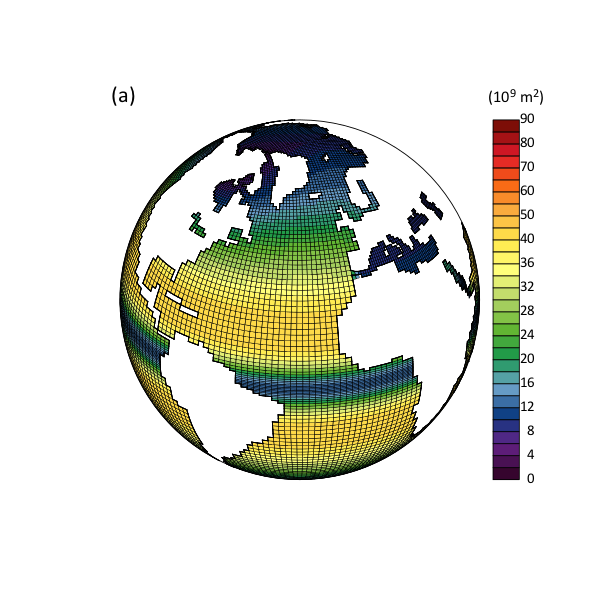

In [78]:
%%ferret -q -s 600,600
set text/font=calibri
let masked_area = if bathy[d=1] GT 0 then area[d=1]*1e-9
go map_ortho ($thredds)/Grids/ORCA2.3 -30 30 masked_area[l=1] "" /line/nolab/pal=rainbow_cmyk/col=1/thick=0.5/lev=(0,40,2)(40,90,5) ORCA2.0_continents
annotate/NORMALIZED/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(a)"
annotate/NORMALIZED/xpos=1.1/ypos=1.05/halign=0/size=0.11 "(10<sup>9</sup> m<sup>2</sup>)"
!frame/file=fig01a.pdf

### Fig. 1b LMDZ grid


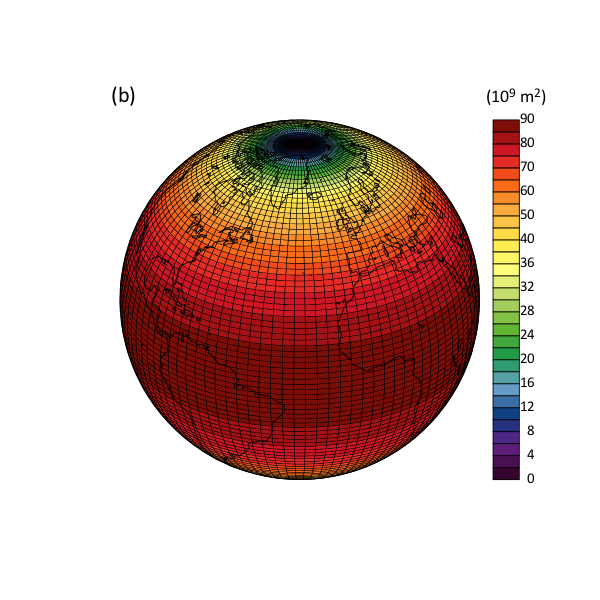

In [79]:
%%ferret -q -s 600,600
set text/font=calibri
cancel data/all
use "($thredds)/Grids/LMDZ_area.nc"
go map_ortho COARDS -30 30 aire[l=1]*1e-9 "" /line/pal=rainbow_cmyk/col=1/thick=0.5/lev=(0,40,2)(40,90,5)/nolab earth_continents
annotate/NORMALIZED/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(b)"
annotate/NORMALIZED/xpos=1.1/ypos=1.05/halign=0/size=0.12 "(10<sup>9</sup> m<sup>2</sup>)"
!frame/file=fig01b.pdf

### Figure 3: Time-series of globally averaged variables over the 2,800 years of the PREIND experiment. a) annual-mean heat content (10^24 J) implied by QTOA (orange line, cumulative values) and OHC (blue line). As in (Hobbs et al., 2016), dashed black lines show the heat content implied by a QTOA of +/- 0.5 W m-2, the observed late-twentieth-century QTOA (Roemmich et al., 2015). b) Sea-surface temperature (orange) and 2-meter air temperature (blue). c) 1000-m (orange) and 500-m (blue) ocean potential temperature.
-----------------------

### Fig. 3a:  OHC.


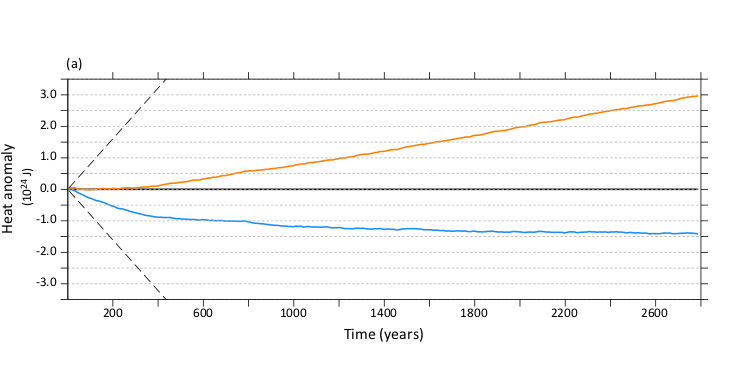

In [80]:
%%ferret -q
cancel data/all
cancel mode logo
use "($thredds)/Timeseries/OHC_preindustrial.nc"
use "($thredds)/Timeseries/TOA_presindustrial.nc"
use "($thredds)/Timeseries/zero.five.nc"
set window/aspect=0.5
set text/font=calibri/isiz=4

!! Define common time axis
def axis/t=1:2800:1 drifttime
!! Define new colors
ppl color 2, 0, 50, 100, 90
ppl color 3, 100, 50, 0, 100
ppl color 4, 80, 0, 80, 50
ppl color 6, 70, 70, 70

let OHC=cpdtfw[d=1]-cpdtfw[l=1,d=1]
let toas=cpdtfw[d=2]
let toas05=cpdtfw[d=3]

!! Define new colors
ppl color 2, 0, 50, 100, 90
ppl color 3, 100, 50, 0, 100
ppl color 4, 80, 0, 80, 50
ppl color 6, 70, 70, 70
plot/set/hgrat=(dash,color=6)/nolab/thick=2/vlim=-3.5:3.5 TOAs[l=@sbx:12,gt=drifttime@asn]*0,OHC[d=1,l=@sbx:12,gt=drifttime@asn],TOAs[l=@sbx:12,gt=drifttime@asn]
ppl plot
plot/over/line=1/dash/nolab toas05[l=@sbx:12,gt=drifttime@asn],toas05[l=@sbx:12,gt=drifttime@asn]*(-1)
annotate/normalized/xpos=0.5/ypos=-0.18/halign=0/angle=0/size=0.12 "Time (years)"
annotate/NORMALIZED/xpos=-0.088/ypos=0.5/halign=0/angle=90/size=0.12 "Heat anomaly"
annotate/NORMALIZED/xpos=-0.058/ypos=0.5/halign=0/angle=90/size=0.1 "(10<sup>24</sup> J)"
annotate/NORMALIZED/xpos=0.01/ypos=1.05/halign=0/size=0.11 "(a)"
!list OHC[d=1,l=@ddc,gt=drifttime@asn]
!frame/file=fig03a.pdf

### Fig. 3b: SST and T2M trends


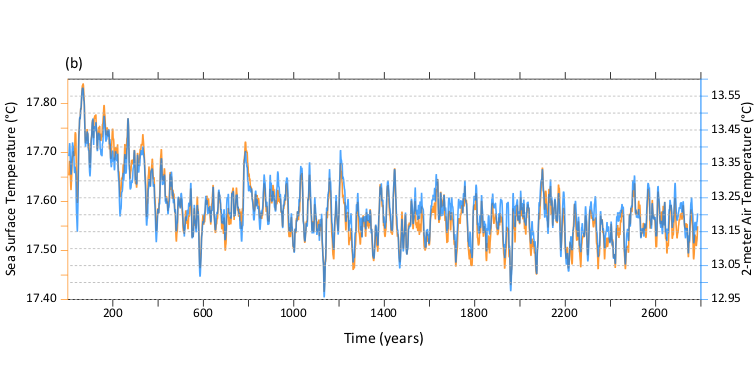

In [81]:
%%ferret
cancel data/all
cancel mode logo
use "($thredds)/Timeseries/preindustrial_sosstsst_global_ave_year.nc"
use "($thredds)/Timeseries/preindustrial_t2m_global_ave_year.nc"
def axis/t=1:2800:1 drifttime

set window/aspect=0.5
set text/font=calibri/color=1
!! Define new colors
ppl color 2, 0, 50, 100, 70
ppl color 3, 100, 50, 0, 80
ppl color 4, 80, 0, 80, 50
ppl color 6, 70, 70, 70

define view/x=0:1/y=0:1 vfull1
define view/x=0:1/y=0:1 vfull2

set view vfull1
ppl pen,0,1
plot/set/hgrat=(dash,color=6)/axes=1,1,0,0/set/title=""/nolab/col=3/thick=2 sosstsst_global[d=1,gt=drifttime@asn,l=@sbx:10]
ppl plot
ppl pen,0,3
ppl %yaxis  ! use the axis values from the plot just drawn

set view vfull2

plot/set/hgrat=(dash,color=6)/axes=0,0,0,1/color=2/title=""/thick=2/nolab  t2m_global[d=2,gt=drifttime@asn,l=@sbx:10]
ppl pen,0,2
ppl plot

annotate/normalized/xpos=0.5/ypos=-0.2/halign=0/angle=0/size=0.12 "Time (years)"
annotate/NORMALIZED/xpos=-0.085/ypos=0.5/halign=0/angle=90/size=0.11 "Sea Surface Temperature (<&deg>C)"
annotate/NORMALIZED/xpos=1.08/ypos=0.5/halign=0/angle=90/size=0.11 "2-meter Air Temperature (<&deg>C)"
ppl pen,0,1

annotate/NORMALIZED/xpos=0.01/ypos=1.05/halign=0/size=0.12 "(b)"

!frame/file=t2m_sst.pdf

### Fig. 3c: 500-meter and 1000-meter temperatures trends


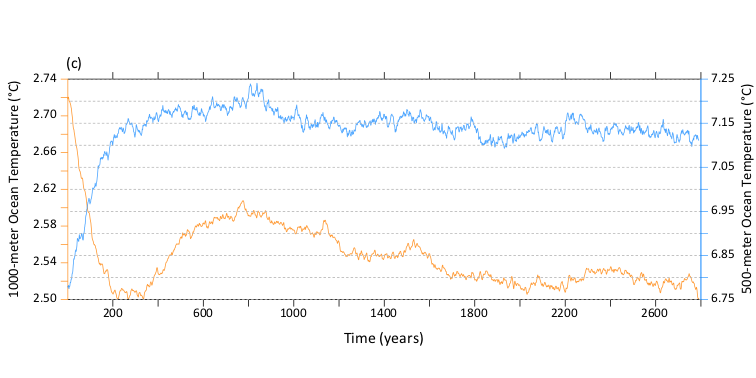

In [82]:
%%ferret -q
cancel data/all
cancel mode logo

use "($thredds)/Timeseries/preindustrial_temp_500m_global_ave_year.nc"
use "($thredds)/Timeseries/preindustrial_temp_1000m_global_ave_year.nc"


set windows/aspect=0.5
set text/font=calibri/isiz=4
!! Define new colors
ppl color 2, 0, 50, 100, 70
ppl color 3, 100, 50, 0, 80
ppl color 4, 80, 0, 80, 50
ppl color 6, 70, 70, 70
define view/x=0:1/y=0:1 vfull1
define view/x=0:1/y=0:1 vfull2

set view vfull1
ppl pen,0,1
plot/set/hgrat=(dash,color=6)/axes=1,1,0,0/set/title=""/nolab/col=3 TEMP_1000M_GLOBAL[d=2,gt=drifttime@asn]
ppl plot
ppl pen,0,3
ppl %yaxis  ! use the axis values from the plot just drawn

set view vfull2

plot/set/hgrat=(dash,color=6)/axes=0,0,0,1/color=2/title=""/thick=1/nolab  TEMP_500M_GLOBAL[d=1,gt=drifttime@asn]
ppl pen,0,2
!ppl ylab "500-meter Ocean Temperature (<&deg>C)"
ppl plot
annotate/normalized/xpos=0.5/ypos=-0.2/halign=0/angle=0/size=0.12 "Time (years)"
annotate/NORMALIZED/xpos=-0.08/ypos=0.5/halign=0/angle=90/size=0.11 "1000-meter Ocean Temperature (<&deg>C)"
annotate/NORMALIZED/xpos=1.08/ypos=0.5/halign=0/angle=90/size=0.11 "500-meter Ocean Temperature (<&deg>C)"
annotate/NORMALIZED/xpos=0.01/ypos=1.05/halign=0/size=0.12 "(c)"
ppl pen,0,1
!frame/file=temp_500_1000_oce.pdf

### Figure 4 : : Zonally-averaged long-wave (a), shortwave (b) and total (c) cloud radiative forcing from IPSL-CM5A2 and IPSL-CM5A historical simulations, compared to the Clouds and the Earth’s Radiant Energy System (CERES) gridded dataset (Loeb et al., 2009). (d). Yearly-averaged total CRF anomaly between IPSL-CM5A2 and CERES data. As CRF is a negative value, positive (negative) anomaly indicates an underestimation (overestimation) of CRF in the model. e) Yearly-averaged difference in near-surface air temperature (°C) between IPSL-CM5A2 and ERA-Interim (Dee et al., 2011). Grey contours indicate surface elevation.


---------------

### -- Preparing the data

In [3]:
%%ferret -q
cancel data/all
cancel mode logo
use "($thredds)/Historical/IPSLCM5A2_atm.nc"
use "($thredds)/Historical/IPSLCM5A_atm.nc"
use "($thredds)/Observations/CERES_EBAF_TOA_Terra_Edition1A_200003-200510_01-12.nc"
use "($thredds)/Observations/tas_pcmdi-metrics_Amon_ERAINT_198901-200911-clim.nc"
!!!! From hismth.nc compute SW & LW cloud radiative effect, then total CRE
let CRELT = (TOPL0-TOPL)
let CREST = (SWUPTOACLR-SWUPTOA)
let CRE = (CREST+CRELT)

!!!! Define zonal averages for the 3 cases : CM5A2, CM5A and CERES
let/title="CM5A2" lw1 = CRELT[x=@ave,l=@ave,d=1]
let/title="CM5A"  lw2 = CRELT[x=@ave,l=@ave,d=2]
let/title="CERES" lw3 = CLIM_lwCRE[x=@ave,l=@ave,d=3]

let/title="CM5A2" sw1 = CREsT[x=@ave,l=@ave,d=1]
let/title="CM5A"  sw2 = CREsT[x=@ave,l=@ave,d=2]
let/title="CERES" sw3 = CLIM_swCRE[x=@ave,l=@ave,d=3]

let/title="CM5A2" cre1 = CRE[x=@ave,l=@ave,d=1]
let/title="CM5A"  cre2 = CRE[x=@ave,l=@ave,d=2]
let/title="CERES" cre3 = CLIM_netCRE[x=@ave,l=@ave,d=3]

### Fig. 4a. Longwave CRE


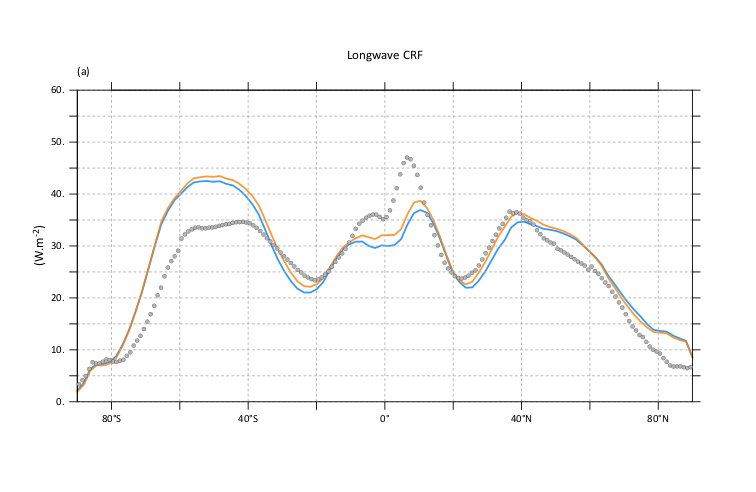

In [4]:
%%ferret -q
cancel mode logo
set window/aspect=0.65
set text/font=calibri
!! Define new colors
ppl color 2, 0, 50, 100, 80
ppl color 3, 100, 50, 0, 80
ppl color 4, 80, 0, 80, 50
ppl color 6, 70, 70, 70

!! Setup plot
plot/set/color/thick=2/key=title/grat=(dash,color=6)/vlim=0:60/nolab lw1,lw2
ppl ylab "(W.m<sup>-2</sup>)"
go unlabel 1
ppl plot
!! Add data with custom symbols
plot/set/nolab/symbol=circfill/o/color=6/highlight/key=title lw3
ppl plot/over
annotate/normalized/xpos=0.01/ypos=1.05/halign=0/size=0.11 "(a)"
annotate/normalized/xpos=0.5/ypos=1.10/halign=0/angle=0/size=0.12 "Longwave CRF "
!frame/file=LW_CRF.pdf

### Fig. 4b. Shortwave CRE


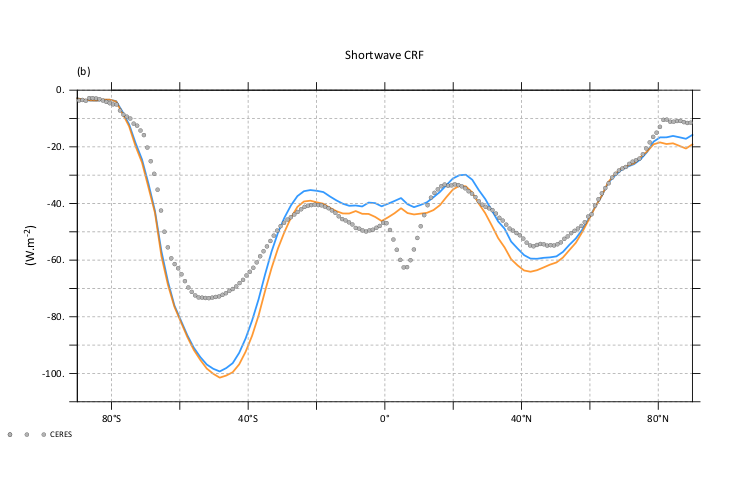

In [5]:
%%ferret -q
cancel mode logo
set window/aspect=0.65
set text/font=calibri
!! Define new colors
ppl color 2, 0, 50, 100, 80
ppl color 3, 100, 50, 0, 80
ppl color 4, 80, 0, 80, 50
ppl color 6, 70, 70, 70

!! Setup plot
plot/set/nolab/color/thick=2/key=title/grat=(dash,color=6) sw1,sw2
ppl ylab "(W.m<sup>-2</sup>)"
go unlabel 1
ppl plot
!! Add data with custom symbols
plot/set/symbol=circfill/o/color=6/highlight/key=title sw3
ppl plot/over
annotate/normalized/xpos=0.01/ypos=1.05/halign=0/size=0.11 "(b)"
annotate/normalized/xpos=0.5/ypos=1.10/halign=0/angle=0/size=0.12 "Shortwave CRF "
!frame/file=SW_CRF.pdf

### Fig. 4c. Total CRE


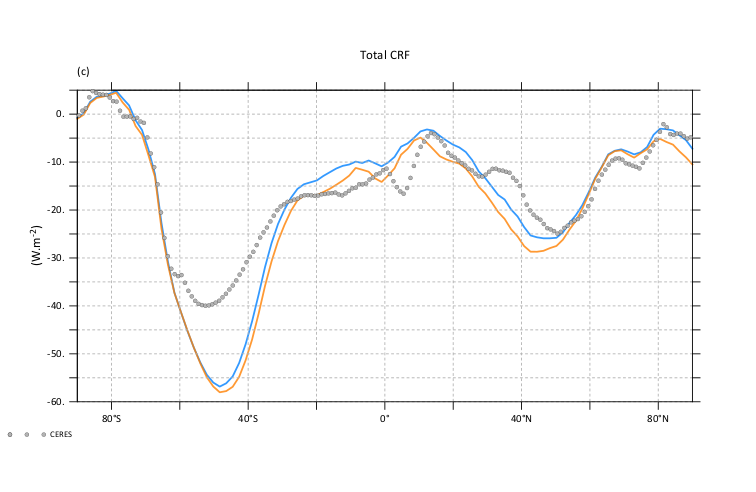

In [6]:
%%ferret -q

cancel mode logo
set window/aspect=0.65
set text/font=calibri
!! Define new colors
ppl color 2, 0, 50, 100, 80
ppl color 3, 100, 50, 0, 80
ppl color 4, 80, 0, 80, 50
ppl color 6, 70, 70, 70

!! Setup plot
plot/set/nolab/color/thick=2/key=title/grat=(dash,color=6) cre1,cre2
ppl ylab "(W.m<sup>-2</sup>)"
go unlabel 1
ppl plot
!! Add data with custom symbols
plot/set/symbol=circfill/o/color=6/highlight/key=title cre3
ppl plot/over
annotate/normalized/xpos=0.01/ypos=1.05/halign=0/size=0.11 "(c)"
annotate/normalized/xpos=0.5/ypos=1.10/halign=0/angle=0/size=0.12 "Total CRF "
list cre1[y=@ave],cre2[y=@ave]
!frame/file=Total_CRF.pdf

### Fig. 4d. Total CRF Anomaly IPSL-CM5A2-CERES


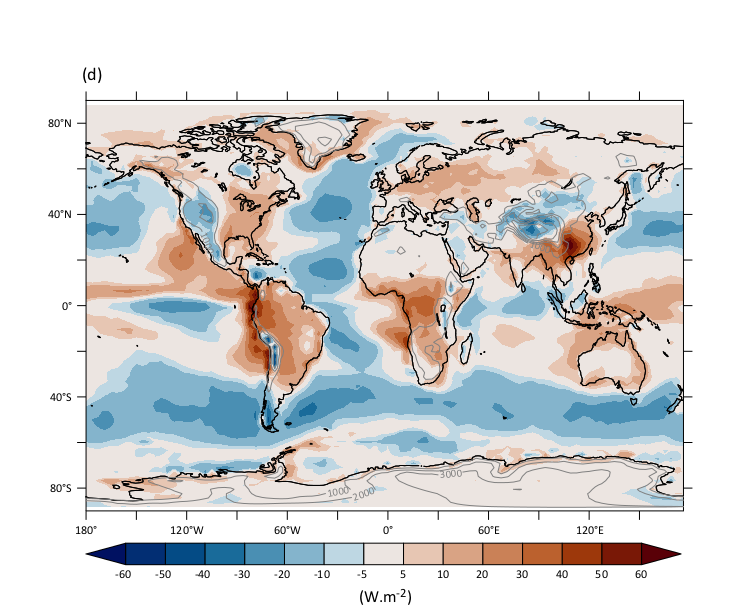

In [7]:
%%ferret -q
cancel mode logo
!!!! Compute anomalies
define axis/t=1:12:1/modulo mytime
let diff_CRE=CRE[d=1]-CLIM_netCRE[gxy=lw1,d=3]
let diff_CREsim=(CRE[d=1])-(CRE[d=2])

fill/set/nolab/lev=(-inf)(-60,-10,10)(-10,10,5)(10,60,10)(inf)del(0)/pal=vik_25 diff_CRE[l=@ave,gt=mytime@asn]
ppl shakey 1,0, 0.1,,,,1.2,9.5, 0.65, 0.95
ppl fill;go land
contour/nolab/over/lev=4/COLOR=(50,50,50),OPACITY=80 phis[d=1,l=1]/9.81
annotate/normalized/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(d)"
annotate/normalized/xpos=0.5/ypos=-0.22/halign=0/size=0.14 "(W.m<sup>-2</sup>)"
!frame/file=map_CRF.pdf

### Fig. 4e: Two-meter temperature anomaly IPSL-CM5A2 minus ERAINT


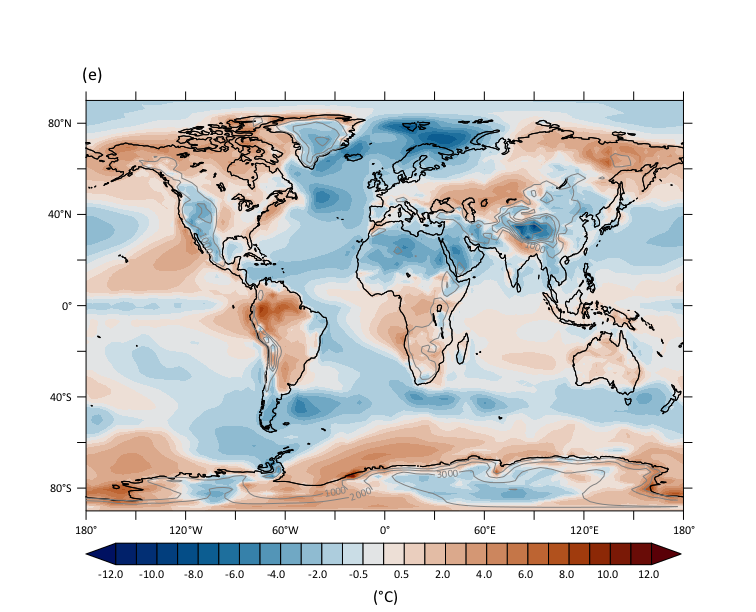

In [8]:
%%ferret -q

set text/font=calibri
def axis/t=1:12:1 time_axis
def sym mytime=1:12
fill/set/nokey/nolab/x=-180:180/lev=(-inf)(-12,-1,1)(-1,1,0.5)(1,12,1)(inf)/pal=vik_25 t2m[d=1,l=($mytime)@ave,gt=time_axis@asn]-tas[d=4,gxy=t2m[d=1],l=($mytime)@ave,gt=time_axis@asn]
ppl shakey 1,0, 0.1,,,,1.2,9.5, 0.65, 0.95
ppl fill; go land
contour/nolab/over/lev=4/COLOR=(50,50,50),OPACITY=80 phis[d=1,l=1]/9.81
annotate/normalized/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(e)"
annotate/normalized/xpos=0.5/ypos=-0.22/halign=0/size=0.14 "(°C)"
!frame/file=ano_t2m.pdf

### Figure 5: Zonally-averaged annual anomalies between: a) IPSL-CM5A2 and IPSL-CM5A temperature, b) IPSL-CM5A2 and IPSL-CM5A zonal wind, c) IPSL-CM5A2 and ERA-Interim (Dee et al., 2011) zonal wind. In each plot, contour lines indicate absolute values for IPSL-CM5A2, IPSL-CM5A2 and ERA-Interim, respectively.
----------

### Fig. 5a : Latitudinal profile of temperature anomaly IPSL-CM5A2 minus IPSL-CM5A

In [9]:
%%ferret 
cancel data/all
use "($thredds)/Historical/IPSLCM5A2_atm.nc"
use "($thredds)/Historical/IPSLCM5A_atm.nc"
use "($thredds)/Observations/ta_Amon_ERAINT_pcmdi-metrics_198901-201001-clim.nc"
use "($thredds)/Observations/ua_Amon_ERAINT_pcmdi-metrics_198901-201001-clim.nc"
use "($thredds)/Observations/ECMWF50_stdpressurelevels.nc"


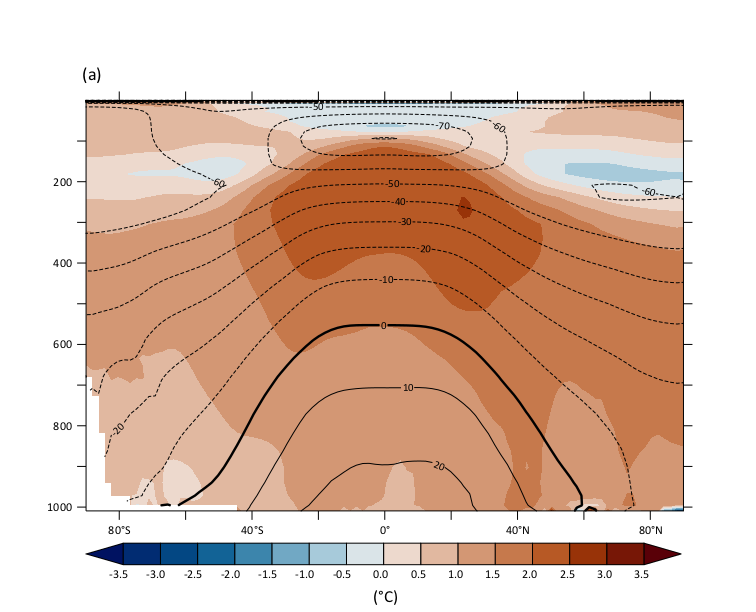

In [10]:
%%ferret -q

set text/font=calibri
def axis/t=1:12:1 mytime
let temp_regrid=ZAXREPLACE(temp,pres/100,Z[GZ=ECMWF50_LEVELS])
let temp_zonal=temp_regrid[x=@ave]
fill/set/lev=(-inf)(-3.5,3.5,0.5)(inf)/nolab/pal=SCP_vik_25/title="Historical IPSL-CM5A2 minus IPSL-CM5A" temp_zonal[d=1,l=@ave,gt=mytime@asn]-temp_zonal[d=2,l=@ave,gt=mytime@asn]
!fill/set/lev=(-inf)(-3.5,3.5,0.5)(inf)/nolab/pal=SCP_vik_25/title="Historical IPSL-CM5A2 minus IPSL-CM5A" temp[d=1,x=@ave,l=@ave,gt=mytime@asn]-temp[d=2,x=@ave,l=@ave,gt=mytime@asn]

ppl shakey 1,0, 0.1,,,,1.2,9.5, 0.65, 0.95
ppl fill
contour/over/nolab temp_zonal[d=1,l=@ave,gt=mytime@asn]-273.15
annotate/normalized/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(a)"
annotate/normalized/xpos=0.5/ypos=-0.22/halign=0/size=0.14 "(°C)"

### Fig.5b : Latitudinal profile of zonal wind anomaly IPSL-CM5A2 minus IPSL-CM5A


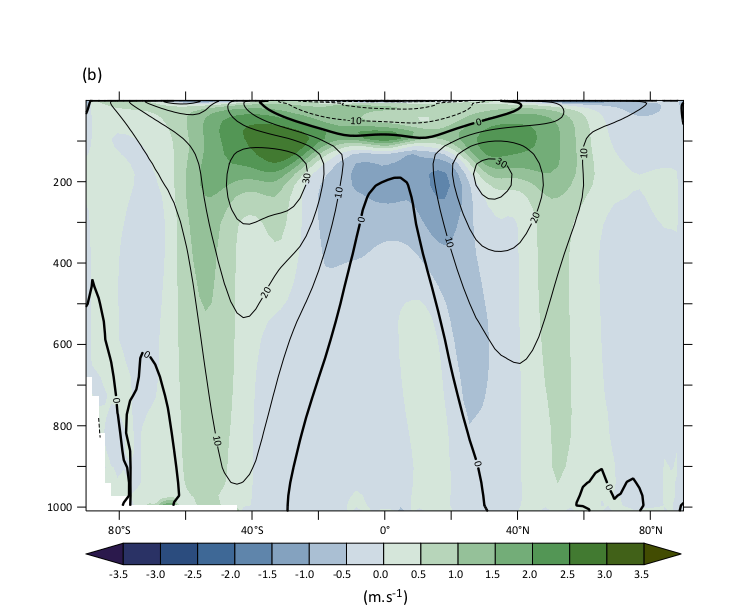

In [11]:
%%ferret -q
def axis/t=1:12:1/modulo mytime
let vitu_regrid=ZAXREPLACE(vitu,pres/100,Z[GZ=ECMWF50_LEVELS])
let vitu_ave=vitu_regrid[x=@ave]
fill/set/nolab/lev=(-inf)(-3.5,3.5,0.5)(inf)/pal=cork_25/key/title="Historical IPSL-CM5A2 minus IPSL-CM5A" vitu_ave[l=@ave,d=1,gt=mytime@asn]-vitu_ave[l=@ave,d=2,gt=mytime@asn]
ppl shakey 1,0, 0.1,,,,1.2,9.5, 0.65, 0.95
ppl fill
contour/over/nolab vitu_ave[l=@ave,d=2,gt=mytime@asn]
annotate/normalized/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(b)"
annotate/normalized/xpos=0.5/ypos=-0.22/halign=0/size=0.14 "(m.s<sup>-1</sup>)"

### Fig.5c : Latitudinal profile of zonal wind anomaly IPSL-CM5A2 minus ERAINT


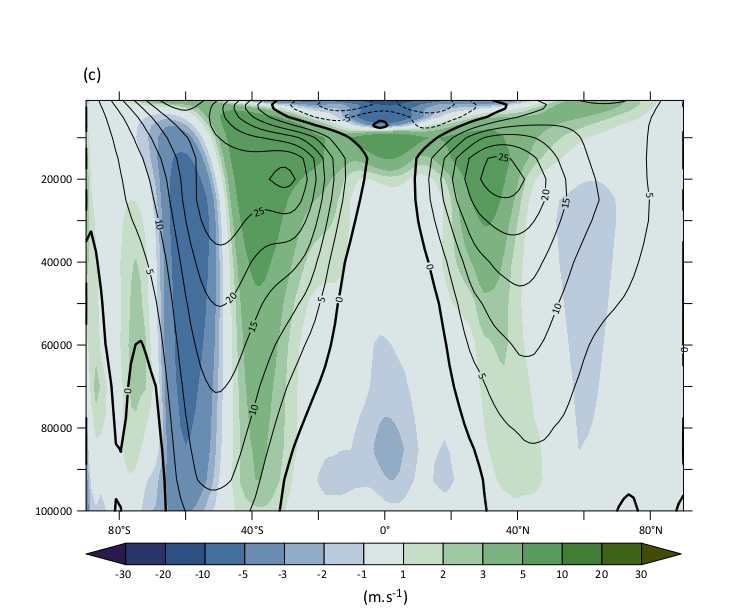

In [12]:
%%ferret -q
let vent_zo_sim=vitu[x=@ave,l=@ave,gxyz=ua[d=4],gt=mytime@asn]
let vent_zo_data=ua[x=@ave,l=@ave,d=4,gt=mytime@asn]
fill/set/nolab/lev=(-inf)(-30,-10,10)(-5)(-3,3,1)(5)(10,30,10)(inf)del(0)/pal=cork_25/title="historical CM5A2 minus data" vent_zo_sim[d=1]-vent_zo_data
ppl shakey 1,0, 0.1,,,,1.2,9.5, 0.65, 0.95
ppl fill
contour/over/nolab/lev=10c/nolab vent_zo_data
annotate/normalized/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(c)"
annotate/normalized/xpos=0.5/ypos=-0.22/halign=0/size=0.14 "(m.s<sup>-1</sup>)"

### Figure 6: Mean sea-level pressure and near-surface wind velocity (colors) and direction for IPSL-CM5A2 (a, d) and ERA-Interim (b, e). c, f. Zonally averaged near-surface wind velocity (m.s-1) for IPSL-CM5A, IPSL-CM5A2 and ERA-Interim. 

### Fig. 6ab IPSL-CM5A2, DJF & JJA 

In [14]:
%%ferret -q
cancel data/all
use "($thredds)/Historical/IPSLCM5A2_atm.nc"
use "($thredds)/Historical/IPSLCM5A_atm.nc"
use "($thredds)/Observations/uas_Amon_ERAINT_pcmdi-metrics_198901-200911-clim.nc"
use "($thredds)/Observations/vas_Amon_ERAINT_pcmdi-metrics_198901-200911-clim.nc"
use "($thredds)/Observations/psl_Amon_ERAINT_pcmdi-metrics_198901-200911-clim.nc"


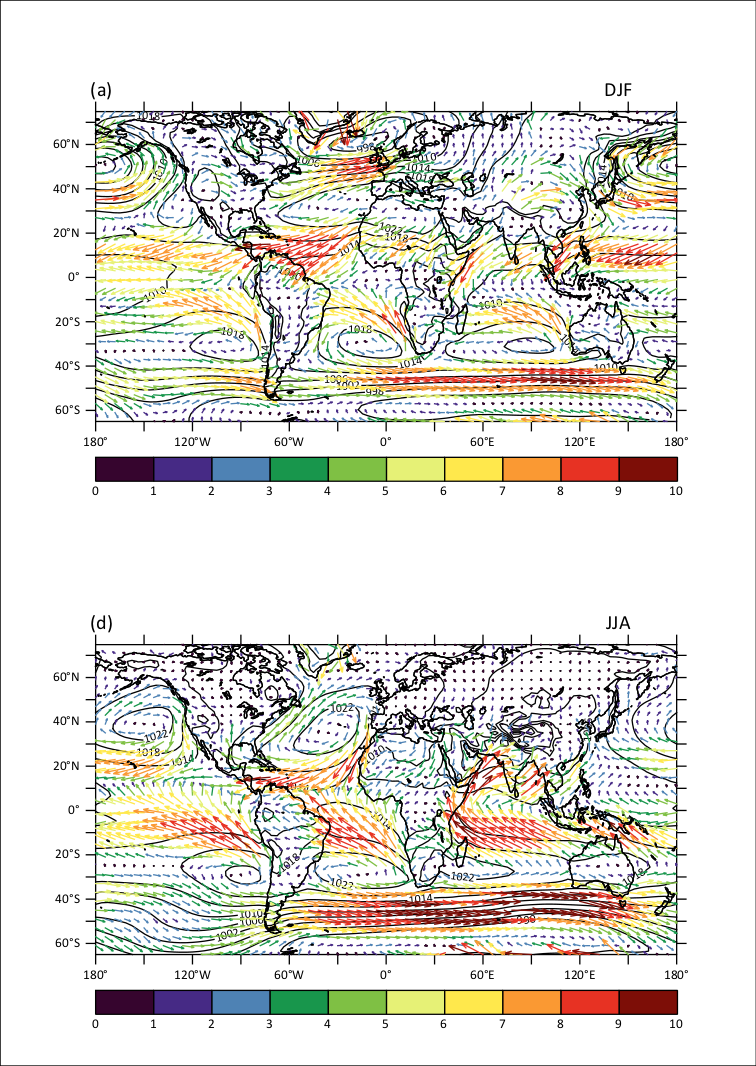

In [15]:
%%ferret -q
set text/font=calibri

def axis/t=1:12:1/modulo mytime

! Setup plot

let uu_djf=vitu[d=1,k=39,l=12:14@ave,gt=mytime@asn,x=-180:180:6,y=-65:75:4]
let vv_djf=vitv[d=1,k=39,l=12:14@ave,gt=mytime@asn,x=-180:180:6,y=-65:75:4]

let uu_jja=vitu[d=1,k=39,l=6:8@ave,gt=mytime@asn,x=-180:180:6,y=-65:75:4]
let vv_jja=vitv[d=1,k=39,l=6:8@ave,gt=mytime@asn,x=-180:180:6,y=-65:75:4]

define symbol vec_cmd      = VECTOR/over/nolab
define symbol vec_len      = 14                    ! value for /LENGTH qualifier
define symbol vec_xskip    = 1                    ! value for /XSKIP qualifier
define symbol vec_yskip    = 1                     ! value for /YSKIP qualifier
define symbol vec_arrowkey = YES                   ! YES or NO, for scale/key vector
define symbol vec_veckey   = 325,78,,(f4.1,"m/s")! arguments to "PPL VECKEY" command
define symbol vec_lo       = 0                     ! low   value for color levels
define symbol vec_hi       = 10                     ! high  value for color levels
define symbol vec_delta    = 1                   ! delta value for color levels
define symbol vec_pal      = rainbow_cmyk      ! palette file name
define symbol vec_colorkey = YES                   ! YES or NO, for color bar/key
define symbol vec_shakey   = 1,0,0.1,,,,1.2,8.5, 0.65, 0.95 ! arguments to "PPL SHAKEY" command
define symbol vec_otherppl = none                  !other ppl commands (should start with "ppl"),

go page_new -i 1 2
set view 1
define symbol vec_u        = uu_djf                    ! u var name, no [],(),*,/,+,-, ^ stuff
define symbol vec_v        = vv_djf                    ! v var name, no [],(),*,/,+,-, ^ stuff

fill/x=-180:180/y=-65:75/line/pal=white/nokey/lev=(980)(990,1022,4)(inf)/d=1/col=1/nolab slp[l=12:14@ave]/100
go color_vector; go land 
annotate/normalized/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(a)"
annotate/normalized/xpos=0.9/ypos=1.05/halign=0/size=0.15 "DJF"

set view 2
define symbol vec_u        = uu_jja                   
define symbol vec_v        = vv_jja                    

fill/x=-180:180/y=-65:75/line/pal=white/lev=(980)(990,1022,4)(inf)/d=1/col=1/nolab slp[l=6:8@ave]/100
go color_vector; go land 
annotate/normalized/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(d)"
annotate/normalized/xpos=0.9/ypos=1.05/halign=0/size=0.15 "JJA"
!frame/file=colowind_CM5A2.pdf

### Fig. 6cd ERA-INT, DJF & JJA 

In [ ]:
%%ferret -q
set text/font=calibri

def axis/t=1:12:1/modulo mytime

! Setup plot

let uu_djf=uas[d=3,l=12:14@ave,gt=mytime@asn,x=-180:180:6,y=-65:75:4]
let vv_djf=vas[d=4,l=12:14@ave,gt=mytime@asn,x=-180:180:6,y=-65:75:4]

let uu_jja=uas[d=3,l=6:8@ave,gt=mytime@asn,x=-180:180:6,y=-65:75:4]
let vv_jja=vas[d=4,l=6:8@ave,gt=mytime@asn,x=-180:180:6,y=-65:75:4]

define symbol vec_cmd      = VECTOR/over/nolab
define symbol vec_len      = 14                    ! value for /LENGTH qualifier
define symbol vec_xskip    = 1                    ! value for /XSKIP qualifier
define symbol vec_yskip    = 1                     ! value for /YSKIP qualifier
define symbol vec_arrowkey = YES                   ! YES or NO, for scale/key vector
define symbol vec_veckey   = 325,78,,(f4.1,"m/s")! arguments to "PPL VECKEY" command
define symbol vec_lo       = 0                     ! low   value for color levels
define symbol vec_hi       = 10                     ! high  value for color levels
define symbol vec_delta    = 1                   ! delta value for color levels
define symbol vec_pal      = rainbow_cmyk      ! palette file name
define symbol vec_colorkey = YES                   ! YES or NO, for color bar/key
define symbol vec_shakey   = 0,0,0.1,,,,1.4,9.5, 0.65, 0.95 ! arguments to "PPL SHAKEY" command
define symbol vec_otherppl = none                  !other ppl commands (should start with "ppl"),

go page_new -i 1 2
set view 1
define symbol vec_u        = uu_djf                    ! u var name, no [],(),*,/,+,-, ^ stuff
define symbol vec_v        = vv_djf                    ! v var name, no [],(),*,/,+,-, ^ stuff

fill/x=-180:180/y=-65:75/line/pal=white/lev=(980)(990,1022,4)(inf)/d=5/col=1/nolab psl[l=12:14@ave]/100
go color_vector; go land 
annotate/normalized/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(d)"
annotate/normalized/xpos=0.9/ypos=1.05/halign=0/size=0.15 "DJF"

set view 2
define symbol vec_u        = uu_jja                   
define symbol vec_v        = vv_jja                    

fill/x=-180:180/y=-65:75/line/pal=white/lev=(980)(990,1022,4)(inf)/d=5/col=1/nolab psl[l=6:8@ave]/100
go color_vector;go land 
annotate/NORMALIZED/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(e)"
annotate/NORMALIZED/xpos=0.9/ypos=1.05/halign=0/size=0.15 "JJA"
!frame/file=colowind_ERAINT.pdf

In [ ]:
%%ferret -s 700,700 -q
cancel mode logo
!show data/brief
go page_new -il 2 1
set text/font=calibri

!! Define new colors
ppl color 2, 0, 50, 100, 80
ppl color 3, 100, 50, 0, 80
ppl color 4, 80, 0, 80, 50
ppl color 6, 70, 70, 70

let/title="IPSL-CM5A2" vi1 = vitu[k=39,x=@ave,d=1,gt=mytime@asn]
let/title="IPSL-CM5A" vi2 = vitu[k=39,x=@ave,d=2,gt=mytime@asn]
let/title="ERA-INT" vidata = uas[x=@ave,d=3,gt=mytime@asn]

!! Setup plot
set view 1
plot/set/hlim=-8:8/vlim=-65:75/transpose/color/thick=2/key=title/grat=(dash,color=6)/nolab vi1[l=12:14@ave],vi2[l=12:14@ave],vidata[l=12:14@ave]
ppl ylab "(m.s<sup>-1</sup>)"
go unlabel 1
ppl plot
annotate/normalized/xpos=0.5/ypos=1.10/halign=0/angle=0/size=0.12 "DJF"

set view 2
plot/set/hlim=-8:8/vlim=-65:75/transpose/color/thick=2/key=title/grat=(dash,color=6) vi1[l=6:8@ave],vi2[l=6:8@ave],vidata[l=6:8@ave]
ppl ylab "(m.s<sup>-1</sup>)"
go unlabel 1
go unlabel 2
ppl plot
annotate/normalized/xpos=0.5/ypos=1.10/halign=0/angle=0/size=0.12 "JJA"
!frame/file=zonalwindplot.pdf

### Figure 7: Seasonally-averaged precipitation (mm/day) for IPSL-CM5A2 (a,c) and anomaly between IPSL-CM5A2 and GPCP data (b, d). Top is DJF, bottom is JJA. e) Zonal average of absolute annually-averaged precipitation (mm/day) for IPSL-CM5A2, IPSL-CM5A and GPCP data.

In [ ]:
%%ferret -q
cancel data/all
use "($thredds)/Historical/IPSLCM5A2_atm.nc"
use "($thredds)/Historical/IPSLCM5A_atm.nc"
use "($thredds)/Observations/pr_pcmdi-metrics_Amon_GPCP_197901-200909-clim.nc"
use "($thredds)/Observations/amazon_mask.nc"

### Fig. 7ab: Absolute values

In [ ]:
%%ferret -q
set text/font=calibri
go page_new -i 1 2
set view 1
ppl color 6, 70, 70, 70
def sym season=12:14
def axis/t=1:12:1/modulo mytime
let/title="Seasonal rainfall"/units="mm/d" rainfall=precip[l=($season)@ave,d=1,gt=mytime@asn]*86400
fill/nokey/set/y=-65:75/hgrat=(dash,color=6)/nolab/lev=(0.5)(1,4,1)(6,12,2)(15)(20)(inf)/pal=mpl_Seq1_YlGnBu rainfall!;go land

ppl shakey 1,0,0.1,,,,1.2,8.7, 0.65, 0.95
ppl fill
cont/o/nolab/opacity=50/col=1/lev=(1000,6000,1000,-3) phis[d=1,l=1]/9.81
go land
annotate/NORMALIZED/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(a)"
annotate/NORMALIZED/xpos=0.9/ypos=1.05/halign=0/size=0.15 "DJF"

set view 2

def sym season=6:8
def axis/t=1:12:1/modulo mytime
let/title="Seasonal rainfall"/units="mm/d" rainfall=precip[l=($season)@ave,d=1,gt=mytime@asn]*86400
fill/nokey/y=-65:75/hgrat=(dash,color=6)/nolab/lev=(0.5)(1,4,1)(6,12,2)(15)(20)(inf)/pal=mpl_Seq1_YlGnBu rainfall!;go land
cont/over/nolab/opacity=50/col=1/lev=(1000,6000,1000,-3) phis[d=1,l=1]/9.81
go land
annotate/normalized/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(b)"
annotate/NORMALIZED/xpos=0.9/ypos=1.05/halign=0/size=0.15 "JJA"
!frame/file=normalized.pdf

### Fig. 7cd: Anomalies IPSL-CM5A2 minus GPCP

In [ ]:
%%ferret -q
set text/font=calibri
ppl color 6, 70, 70, 70

let precip_diff=precip[d=1,gt=mytime@asn]-pr[d=3,g=precip[d=1],gt=mytime@asn]

go page_new -i 1 2

set view 1
def sym season=12:14
fill/set/nokey/y=-65:75/hgrat=(dash,color=6)/nolab/lev=(-inf)(-9,-5,2)(-5,-1,1)(-1,1,0.5)(1,5,1)(5,8,2)(inf)/pal=SCP_vik_25_rev3 precip_diff[l=($season)@ave]*86400
ppl shakey 1,0,0.1,1,1,,1.2,8.7, 0.65, 0.95
ppl fill;go land
cont/o/nolab/opacity=50/col=1/lev=(1000,6000,1000,-3) phis[d=1,l=1]/9.81
annotate/NORMALIZED/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(c)"
annotate/NORMALIZED/xpos=0.9/ypos=1.05/halign=0/size=0.15 "DJF" 
set view 2
def sym season=6:8
fill/nokey/y=-65:75/hgrat=(dash,color=6)/nolab/lev=(-inf)(-9,-5,2)(-5,-1,1)(-1,1,0.5)(1,5,1)(5,8,2)(inf)/pal=SCP_vik_25_rev3 precip_diff[l=($season)@ave]*86400
go land
cont/o/nolab/opacity=50/col=1/lev=(1000,6000,1000,-3) phis[d=1,l=1]/9.81
annotate/NORMALIZED/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(d)"
annotate/NORMALIZED/xpos=0.9/ypos=1.05/halign=0/size=0.15 "JJA"

### Fig. 7e: Latitudinal profile of precipitation

In [ ]:
%%ferret -q -s 400,400
set windows/aspect=1.75
set text/font=calibri
!! Define new colors
ppl color 2, 0, 50, 100, 70
ppl color 3, 100, 50, 0, 80
ppl color 4, 80, 0, 80, 50
ppl color 6, 70, 70, 70


let/title="IPSL-CM5A2" pr2=precip[d=1,x=@ave,l=@ave]*86400
let/title="IPSL-CM5A" pr3=precip[d=2,x=@ave,l=@ave]*86400
let/title="GPCP" pr1=pr[d=3,x=@ave,l=@ave]*86400
plot/transpose/thick/set/hgrat=(dashed,color=6)/key=title pr1,pr2,pr3
!go unlabel 2
!go unlabel 1
ppl xlab "mm.day<sup>-1</sup>"
ppl plot
annotate/normalized/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(e)"

### Fig. 8. Rainfall patterns over South America. The map shows the precipitation annual mean (mm/day) simulated in IPSL-CM5A2 historical experiment. Insert on the map shows the seasonal cycle over the entire Amazon basin (blue line) for IPSL-CM5A, IPSL-CM5A2 and GPCP data. Inserts at the edges of the map show the seasonal cycles for three subregions of the Amazon basins. 

In [ ]:
%%ferret -q -s 600,400
set window/aspect=1.2
ppl color 2, 0, 50, 100, 50
ppl color 3, 100, 50, 0, 50
ppl color 4, 80, 0, 80, 50
ppl color 6, 70, 70, 70
def sym mytime=1:12
let/title="Seasonal rainfall"/units="mm/d" rainfall=precip[l=($mytime)@ave,d=1,gt=mytime@asn]*86400
shade/nolab/lev=(0.5)(1,4,1)(6,12,2)(15)(20)(inf)/pal=mpl_Seq1_YlGnBu/key/y=-57:17/x=-90:-30 rainfall;go land " " " " " " 1
vect/over/opacity=50/title="Surface wind (m/s)"/col=black/length=12/xskip=1/yskip=1/k=39 vitu[l=($mytime)@ave,d=1],vitv[l=($mytime)@ave,d=1]
cont/over/nolab/opacity=50/col=1/lev=(0,5000,500,-3) phis[d=1,l=1]/9.81
go box -62 -50 -15 -5 1
go box -77 -68 -12 5 1
go box -68 -50 0 5 1

### Fig. 8 (inserts). Seasonal cycle in different areas of the Amazon basin


In [ ]:
%%ferret -q
show grid precip[d=1]
show grid pr[d=3]

set mode linecolors:12
def axis/t=1:12:1/modulo/units=months mytime
go page_new -i 2 2
ppl color 2, 0, 50, 100, 70

ppl color 3, 100, 50, 0, 70
ppl color 4, 98, 77, 0, 70

ppl color 5, 98, 0, 71, 70
ppl color 6, 98, 0, 22, 70

ppl color 7, 70, 70, 70, 50
let precip_CM5A2_amaz= if amaz[d=4,g=GIV1,l=1] GT 0 then precip[d=1,gt=mytime@asn]*86400
let precip_CM5A_amaz= if amaz[d=4,g=GIV1,l=1] GT 0 then precip[d=2,gt=mytime@asn]*86400
let precip_GPCP_amaz = if amaz[d=4,g=GTM2,l=1] GT 0 then pr[d=3,gt=mytime@asn]*86400
let/title="Northwestern Amazon CM5A2" var1= precip_CM5A2_amaz[x=-77:-68@ave,y=-12:5@ave]
let/title="South Central Amazon CM5A2" var2= precip_CM5A2_amaz[x=-62:-50@ave,y=-15:-5@ave]
let/title="Northern Amazon CM5A2" var3= precip_CM5A2_amaz[x=-68:-50@ave,y=0:5@ave]

let/title="Northwestern Amazon CM5A" var4= precip_CM5A_amaz[x=-77:-68@ave,y=-12:5@ave]
let/title="South Central Amazon CM5A" var5= precip_CM5A_amaz[x=-62:-50@ave,y=-15:-5@ave]
let/title="Northern Amazon CM5A" var6= precip_CM5A_amaz[x=-68:-50@ave,y=0:5@ave]

let/title="Northwestern Amazon GPCP" var7= precip_GPCP_amaz[x=-77:-68@ave,y=-12:5@ave]
let/title="South Central Amazon GPCP" var8= precip_GPCP_amaz[x=-62:-50@ave,y=-15:-5@ave]
let/title="Northern Amazon GPCP" var9= precip_GPCP_amaz[x=-68:-50@ave,y=0:5@ave]

let/title="Full Amazon GPCP" var10= precip_GPCP_amaz[x=@ave,y=@ave]
let/title="Full Amazon CM5A2" var11= precip_CM5A2_amaz[x=@ave,y=@ave]
let/title="Full Amazon CM5A" var12= precip_CM5A_amaz[x=@ave,y=@ave]
set view 1
plot/set/vlim=0:14/hlim=1:12/grat=(dash,color=7)/key=title/thick=2 var7,var1,var4
ppl plot
set view 2
plot/vlim=0:14/grat=(dash,color=7)/key=title/thick=2 var8,var2,var5
set view 3
plot/vlim=0:14/grat=(dash,color=7)/key=title/thick=2 var9,var3,var6
set view 4
plot/vlim=0:14/grat=(dash,color=7)/key=title/thick=2 var10,var11,var12
!frame/file=plot_season_ama3zon.pdf

### Fig. 9. Rainfall patterns over Africa. The map shows the precipitation annual mean (mm/day) simulated in IPSL-CM5A2 historical experiment. Inserts on the sides of the map show the seasonal cycle over the Congo basin and the west African monsoon region for IPSL-CM5A, IPSL-CM5A2 and GPCP data. 

In [ ]:
%%ferret -q
set mode linecolors:12
def axis/t=1:12:1/modulo mytime
go page_new -il 2 1
ppl color 2, 0, 50, 100, 70
ppl color 3, 100, 50, 0, 70
ppl color 4, 98, 77, 0, 70
ppl color 5, 98, 0, 71, 70
ppl color 6, 98, 0, 22, 70
ppl color 7, 70, 70, 70, 50

let/title="Congo Basin CM5A2" var1=precip[x=10:27@ave,y=-5:5@ave,d=1,gt=mytime@asn]*86400
let/title="Western Africa CM5A2" var2=precip[x=-15:10@ave,y=5:15@ave,d=1,gt=mytime@asn]*86400
let/title="Congo Basin CM5A" var3=precip[x=10:27@ave,y=-5:5@ave,d=2,gt=mytime@asn]*86400
let/title="Western Africa CM5A" var4=precip[x=-15:10@ave,y=5:15@ave,d=2,gt=mytime@asn]*86400
let/title="Congo Basin GPCP" var5=pr[x=10:27@ave,y=-5:5@ave,d=3,gt=mytime@asn]*86400
let/title="Western Africa GPCP" var6=pr[x=-15:10@ave,y=5:15@ave,d=3,gt=mytime@asn]*86400

set view 1
plot/vlim=0:14/grat=(dash,color=7)/key=title/thick=2 var6,var2,var4
set view 2
plot/vlim=0:14/grat=(dash,color=7)/key=title/thick=2 var5,var1,var3
!frame/file=precip_africa_season_2regions.pdf

### Fig. 10. Hovmöller diagrams of precipitation (mm.d-1) averaged over a 95°E-115°E range. Left, GPCP, right, IPSL-CM5A2. 

In [ ]:
%%ferret -q
go page_new -il 2 1
set view 1
fill/line/pal=mpl_Seq1_YlGnBu/lev=(0,16,1)(inf)/key/nolab pr[d=3,x=95:115@ave,y=-14:14,gt=precip[d=1]@asn]*86400
set view 2
fill/line/pal=mpl_Seq1_YlGnBu/lev=(0,16,1)(inf) precip[d=1,x=95:115@ave,y=-14:14]*86400

### Fig. 11. Anomalies of surface temperature (top), and surface salinity (low), between IPSL-CM5A and data (left) and IPSL-CM5A2 and data (right).

In [ ]:
%%ferret -q
cancel data/all
cancel mode logo
use "($thredds)/Historical/IPSLCM5A2_grid_T_1x1.nc"
use "($thredds)/Historical/IPSLCM5A_grid_T_1x1.nc"
use "($thredds)/Observations/thetao_Omon_WOA13-v2_observations_195501-201212-clim.nc"
use "($thredds)/Observations/so_Omon_WOA13-v2_observations_195501-201212-clim.nc"
use "($thredds)/Grids/2masks_regridded.nc"
def axis/t=1:12:1/modulo mytime
let temp_woa   =thetao[d=3,gt=mytime@asn]-273.15
let temp_CM5A2 = thetao[d=1,gt=mytime@asn]
let temp_CM5A  = votemper[d=2,gt=mytime@asn]

let sal_woa   =so[d=4,gt=mytime@asn]
let sal_CM5A2 = so[d=1,gt=mytime@asn]
let sal_CM5A  = vosaline[d=2,gt=mytime@asn]
show grid temp_woa
show grid temp_CM5A2

#### Fig. 11ab : SST anomalies CM5A2 & CM5A vs DATA

In [ ]:
%%ferret -q
fill/pal=SCP_vik_25/k=1/lev=(-inf)(-5,5,0.5)(inf)del(0)/nolab temp_cm5a[gx=temp_woa,l=@ave]-temp_woa[l=@ave,d=3];go land
annotate/NORMALIZED/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(a)"
!frame/file=ano_temp_cm5a.pdf

In [ ]:
%%ferret -q
fill/pal=SCP_vik_25/k=1/lev=(-inf)(-5,5,0.5)(inf)del(0)/nolab temp_cm5a2[gx=temp_woa,l=@ave]-temp_woa[l=@ave,d=3];go land
annotate/NORMALIZED/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(b)"
!frame/file=ano_temp_cm5a2.pdf

#### Fig. 11cd : SSS anomalies CM5A2 & CM5A vs DATA

In [ ]:
%%ferret -q
!show data/brief
fill/pal=SCP_broc_25/k=1/lev=(-inf)(-3,3,0.25)(inf)/nolab sal_cm5a[gx=sal_woa,l=@ave]-sal_woa[l=@ave,d=3];go land
annotate/NORMALIZED/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(c)"
!frame/file=ano_sal_cm5a.pdf

In [ ]:
%%ferret -q
fill/pal=SCP_broc_25/k=1/lev=(-inf)(-3,3,0.25)(inf)/nolab sal_cm5a2[gx=sal_woa,l=@ave]-sal_woa[l=@ave,d=3];go land
annotate/NORMALIZED/xpos=0.01/ypos=1.05/halign=0/size=0.15 "(d)"
!frame/file=ano_sal_cm5a2.pdf

### Fig. 12. Yearly-averaged anomalies between simulated temperature and salinity averaged over 1980-1999 and the WOA2013 observations (Locarnini et al., 2013; Zweng et al., 2013).

In [ ]:
%%ferret -q
set text/font=calibri
let temp_woa_atl_0 = if ATLMSK_NOMED[d=5,gx=thetao[d=3]] EQ 1 then thetao[d=3]
let temp_woa_atl = temp_woa_atl_0[i=@ave,l=@ave]-273.15

let temp_woa_pac_0 = if pacmsk[d=5,gx=thetao[d=3]] EQ 1 then thetao[d=3]
let temp_woa_pac = temp_woa_pac_0[i=@ave,l=@ave]-273.15

let temp_sim_atl_0 = if ATLMSK_NOMED[d=5,gx=thetao[d=1]] EQ 1 then thetao[d=1]
let temp_sim_atl = temp_sim_atl_0[i=@ave,l=@ave]

let temp_sim_pac_0 = if pacmsk[d=5,gx=thetao[d=1]] EQ 1 then thetao[d=1]
let temp_sim_pac = temp_sim_pac_0[i=@ave,l=@ave]


!def symb qual1=/pal=rainbow_cmyk/lev=(-inf)(0,6,0.5,-3)(6,30,2,-3)(inf)
def symb qual1=/pal=SCP_vik_25/lev=(-inf)(-5,5,0.5)(inf)del(0)
set view left ; go margins_set 20 20 20 0; 
fill/line/hlim=90:-90:45/nolab/nokey/axes=(1,1,1,0)/($qual1) temp_sim_pac[gz=gnl1]-temp_woa_pac
annotate/NORMALIZED/xpos=0.4/ypos=0.07/size=0.13 "Pacific"

set view right ; go margins_set 20 20 0 20 ; 
fill/line/hlim=-90:90:45/nokey/nolab/axes=(1,1,0,1)/($qual1) temp_sim_atl[gz=gnl1]-temp_woa_atl
annotate/normalized/xpos=0.4/ypos=0.07/size=0.13 "Atlantic"
annotate/normalized/angle=90/xpos=0.02/ypos=0.37/size=0.13 "Antarctic"
set view full ; 
go colorbar_put -h 10 90 08 12 0.3 /($qual1) 1
!frame/file=coupe_delta_temp.pdf

In [ ]:
%%ferret -q
set text/font=calibri
let sal_woa_atl_0 = if ATLMSK_NOMED[d=5,gx=so[d=4]] EQ 1 then so[d=4]
let sal_woa_atl = sal_woa_atl_0[i=@ave,l=@ave]

let sal_woa_pac_0 = if pacmsk[d=5,gx=so[d=4]] EQ 1 then so[d=4]
let sal_woa_pac = sal_woa_pac_0[i=@ave,l=@ave]

let sal_sim_atl_0 = if ATLMSK_NOMED[d=5,gx=so[d=1]] EQ 1 then so[d=1]
let sal_sim_atl = sal_sim_atl_0[i=@ave,l=@ave]

let sal_sim_pac_0 = if pacmsk[d=5,gx=so[d=1]] EQ 1 then so[d=1]
let sal_sim_pac = sal_sim_pac_0[i=@ave,l=@ave]


def symb qual1=/pal=SCP_broc_25/lev=(-inf)(-3,-1,0.25)(-1,1,0.1)(1,3,0.25)(inf)del(0)

set view left ; go margins_set 20 20 20 0; 
fill/line/hlim=90:-90:45/nolab/nokey/axes=(1,1,1,0)/($qual1) sal_sim_pac[gz=gnl1]-sal_woa_pac
annotate/NORMALIZED/xpos=0.4/ypos=0.07/size=0.13 "Pacific"

set view right ; go margins_set 20 20 0 20 ; 
fill/line/hlim=-90:90:45/nokey/nolab/axes=(1,1,0,1)/($qual1) sal_sim_atl[gz=gnl1]-sal_woa_atl
annotate/normalized/xpos=0.4/ypos=0.07/size=0.13 "Atlantic"
annotate/normalized/angle=90/xpos=0.02/ypos=0.37/size=0.13 "Antarctic"

set view full ; 
go colorbar_put -h 10 90 08 12 0.3 /($qual1) 1
!frame/file=coupe_delta_sal.pdf

### Fig. 13 : a,b. March sea-ice cover (%) for IPSL-CM5A (left) and IPSL-CM5A2 (right) historical runs. Contour indicates Observations. c,d. January-February-March average of mixed-layer depth (meters) for IPSL-CM5A (left) and IPSL-CM5A2 (right).

### Fig. 14. Global meridional heat transport in the ocean, in petaWatts (PW).

In [ ]:
%%ferret -q
cancel data/all
cancel mode logo
use "($thredds)/Grids/orca2.3.nc"
use "($thredds)/Historical/IPSLCM5A_grid_V.nc"
use "($thredds)/Historical/IPSLCM5A2_grid_V.nc"

In [ ]:
%%ferret
set window/aspect=0.75
set text/font=calibri/isiz=4
!! Define new colors
ppl color 2, 0, 50, 100, 70
ppl color 3, 100, 50, 0, 80
ppl color 4, 80, 0, 80, 50
ppl color 6, 70, 70, 70
let/title="IPSL-CM5A" trans_CM5A=hfy[d=2,l=@ave,x=@sum,gy=glat@asn]*1e-15
let/title="IPSL-CM5A2" trans_CM5A2=SOMEHETR[d=3,l=@ave,x=@sum,gy=glat@asn]*1e-15

def axis/y/units=degrees_north glat=nav_lat[d=1,i=57,j=1:148]

!Make the plot
plot/thick/vlim=-2:3/hlim=-90:90/hgrat=dash/vgrat=dash/key=title/thick=2/col=white/nolab trans_CM5A2
plot/thick/vlim=-2:3/hlim=-90:90/hgrat=dash/vgrat=dash/key=title/thick=2/col=2/o trans_CM5A2
plot/thick/vlim=-2:3/hlim=-90:90/hgrat=dash/vgrat=dash/key=title/thick=2/col=3/o trans_CM5A
!plot/thick/key=title/o/col=3 trans_CM5A
annotate/nouser/xpos=-0.8/ypos=3/halign=0.9/angle=90/size=0.14 "(PW)"
annotate/nouser/xpos=4/ypos=-0.8/halign=0/angle=0/size=0.14 "Global Ocean Heat Transport"
!frame/file=GOHT.pdf

### Figure 15: a. Atlantic meridional streamfunction (Sv) averaged over the 1980-1999 period of the historical run. 
-------------

In [ ]:
%%ferret -q
cancel data/all
cancel mode logo
use "($thredds)/Grids/orca2.3.nc"
use "($thredds)/Historical/IPSLCM5A2_grid_V.nc"

In [ ]:
%%ferret -q
set window/aspect=0.75
set text/font=calibri/isiz=4

! Mask mass transport (kg/s) over basins
let mymask=if mask_atl[d=1] EQ mask_nomed[d=1] and  J GT 50 then mask_atl[d=1]
let VOMEMATR_ATL = IF mymask GT 0 THEN VOMEMATR

! Compute psi in Sv
let PSIVER_ATL = (VOMEMATR_ATL[I=@SUM,K=@RSU]-VOMEMATR_ATL[I=@SUM,K=@SUM])*1E-9

!Make the plot
def axis/y/units=degrees_north glat=nav_lat[d=1,i=57,j=1:148]
fill/nolab/key/y=-30:80/pal=SCP_cork_25/lev=(-inf)(-13,13,1)(inf)/d=2 psiver_atl[l=@ave,gy=glat@asn]
contour/o/nolab/d=2/y=-30:80/lev=(-inf)(-14,14,2)(inf)del(0)/d=2 psiver_atl[l=@ave,gy=glat@asn]
go text_put 50 10 "Meridional mass streamfunction Atlantic (Sv)"
frame/file=AMOC_historical.pdf

### Figure 15: b. Barotropic streamfunction (bsf) of IPSL-CM5A2 preindustrial experiment (contours) and anomaly of bsf absolute values between IPSL-CM5A2 and IPSL-CM5A preindustrial runs.
-------------

In [ ]:
%%ferret -q
cancel data/all
cancel mode logo
use "($thredds)/Historical/diff_bsf_ORCA2-1x1.nc"
use "($thredds)/Historical/bsf_cm5a2_ORCA2-1x1.nc"

In [ ]:
%%ferret -q
set region/y=-80:80/x=35:395

let bdiff=if abs(diff) lt 500 then diff*(-1) else 1e20
set variable/bad=1e20 bdiff

fill/set/nolabel/palette=SCP_vik_25/level=(-inf)(-28,-16,4)(-16,16,2)(16,28,4)(inf) bdiff[d=1]
ppl shakey 1,0, 0.1,,,,1.2,9.5, 0.65, 0.95
ppl fill

annotate/NORMALIZED/xpos=0.01/ypos=1.05/halign=0/size=0.11 "(b)"
annotate/NORMALIZED/xpos=0.5/ypos=-0.22/halign=0/size=0.12 "(Sv)"
!annotate/NORMALIZED/xpos=0.5/ypos=1.05/halign=0/size=0.15 "Barotropic streamfunction anomaly"
!contour/size=0.09/line=5/o/nolabel/level=(-24,-2,2)(-1)(1)(2,24,2) bdiff[d=1]
contour/size=0.07/line=5/nolabel/o/level=(-200,-10,10)(10,200,10)/x=-500:500 bdiff[d=2]
go fland "" white; go land
!frame/file=BSF.pdf

### Figure 16: Ocean Primary Productivity
-------------

### Fig. 16a. Observations map

In [ ]:
%%ferret -q 
use "($thredds)/Observations/standard_VGPM.SeaWIFS.global_1x1_clim.nc"
set text/font=calibri
fill/set/x=-180:180/nolab/nokey/lev=(0,100,10)(100,1000,100)(inf)/pal=rainbow_cmyk npp[l=@ave]
ppl shakey 1,0, 0.1,,,,1.2,9.5, 0.65, 0.95
ppl fill; go land
annotate/normalized/xpos=0.01/ypos=1.05/halign=0/size=0.11 "(a)"
annotate/normalized/xpos=0.5/ypos=-0.22/halign=0/size=0.11 "(mgC.m<sup>-2</sup>.d<sup>-1</sup>)"
annotate/normalized/xpos=0.5/ypos=1.05/halign=0/size=0.15 "Net Primary Production (Obs.)"
!frame/file=NPP_Obs.png

### For information. NPP IPSL-CM5A

In [ ]:
%%ferret -q 
use "($thredds)/Historical/intpp_IPSLCM5A.nc"
set text/font=calibri
fill/set/x=-180:180/nolab/nokey/lev=(0,100,10)(100,1000,100)(inf)/pal=rainbow_cmyk intpp[l=@ave]*86400*12*1000
ppl shakey 1,0, 0.1,,,,1.2,9.5, 0.65, 0.95
ppl fill;go land
annotate/NORMALIZED/xpos=0.01/ypos=1.05/halign=0/size=0.11 "(b)"
annotate/NORMALIZED/xpos=0.5/ypos=-0.22/halign=0/size=0.11 "(mgC.m<sup>-2</sup>.d<sup>-1</sup>)"
annotate/NORMALIZED/xpos=0.5/ypos=1.05/halign=0/size=0.15 "Net Primary Production (IPSL-CM5A)"
!frame/file=NPP_Obs_2.pdf

### Fig. 16b. IPSL-CM5A2 map

In [ ]:
%%ferret -q
cancel d/a
cancel region
use "($thredds)/Historical/intpp_IPSLCM5A2.nc"
use "($thredds)/Grids/ORCA2.3_grid.nc"
fill/set/nolab/nokey/lev=(0,100,10)(100,1000,100)(inf)/pal=rainbow_cmyk/x=-180:180 TPP[z=@din,l=@ave,d=1]*1000*12*86400
ppl shakey 1,0, 0.1,,,,1.2,9.5, 0.65, 0.95
ppl fill; go land
annotate/normalized/xpos=0.01/ypos=1.05/halign=0/size=0.11 "(b)"
annotate/normalized/xpos=0.5/ypos=-0.22/halign=0/size=0.11 "(mgC.m<sup>-2</sup>.d<sup>-1</sup>)"
annotate/normalized/xpos=0.5/ypos=1.05/halign=0/size=0.15 "Net Primary Production (IPSL-CM5A2)"

!! Compute total productivity in PgC / year

! Get the surface for each gridcell from ORCA2.3.nc
let ocean_surf_grid=area[d=2]*mask[d=2]

! Get TPP integrated over the entire ocean column (molC.m-3.s-1 to gC.m-2.s-1)
let TPP_c_m2_s = TPP[Z=@DIN,D=1]*12

! mult-iply by gridcell surface (--> gC.s-1)
let TPP_c_s = TPP_c_m2_s*ocean_surf_grid

! Sum over the entire ocean, convert in PgC.day-1
let TPP_tot=TPP_c_s[x=@sum,y=@sum]*86400*1e-15
! In PgC.year-1
!! Uncomment and turn off quiet mode to get the value :
!list TPP_tot[l=@sum]*30

!frame/file=NPP_model.pdf

### Fig. 16c. Latitudinal profile with corrected values at high latitudes

In [ ]:
%%ferret -q 
cancel data/all
use "($thredds)/Observations/standard_VGPM.SeaWIFS.global_1x1_clim.nc"
use "($thredds)/Historical/intpp_IPSLCM5A2.nc"
use "($thredds)/Historical/intpp_IPSLCM5A.nc"

In [ ]:
%%ferret -q -s 400,400 

set text/font=calibri
set window/aspect=1.95
!! Define new colors
ppl color 2, 0, 50, 100, 80
ppl color 3, 100, 50, 0, 80
ppl color 4, 80, 0, 80, 50
ppl color 6, 70, 70, 70

define axis/t=1:12:1 mytime
let intpp_cm5a2 = tpp[d=2,z=@din]*3600*24*12*1000
let intpp_cm5a2_m = if npp[d=1] then intpp_cm5a2[d=2,gt=time@asn]

let intpp_cm5a = if npp[d=1] then intpp[d=3,gt=time@asn]*86400*12*1000
let/title="SeaWIFS data" npp_data=npp[x=@ave,l=@ave,d=1]
let/title="IPSL-CM5A2" npp_cm5a2=intpp_cm5a2_m[x=@ave,l=@ave]
let/title="IPSL-CM5A" npp_cm5a=intpp_cm5a[x=@ave,l=@ave]
plot/set/transpose/thick=2/key=title/grat=(dash,color=6) npp_data,npp_cm5a2,npp_cm5a
go unlabel 1
go unlabel 2
go unlabel 3

ppl plot
annotate/normalized/xpos=0.5/ypos=1.05/halign=0/size=0.12 "Net Primary Production (mgC.m<sup>-2</sup>.d<sup>-1</sup>)"
annotate/normalized/xpos=0.01/ypos=1.02/halign=0/size=0.11 "(c)"
!frame/file=profile_NPP_CM5A2vsDATA.pdf

### Fig. 17. (Top) First EOF of the yearly AMOC, in Sv, (center) variance spectrum of the associated PC1 and (bottom) AMV pattern in K.

### Fig. 18. Comparisons of ORCA2 grid (left) and PALEORCA grid (right). Color shading shows spatial resolution (km2). Grey-shaded areas on ORCA surround the refinements of the grid over the Mediterranean, Red, Black and Caspian seas. The centers of blue areas show the two poles, that have been rotated in PALEORCA. 

### Left.

In [ ]:
%%ferret -q
cancel data/all
cancel v all
cancel mode logo
use "($thredds)/Grids/ORCA2.3_grid.nc"
show d/a 

set w 1
go map_ortho ORCA2.3 30 60 area[k=1,d=1]*1e-6 "" /lev=12/line/pal=rainbow_cmyk/thick=0.3/lev=(0,4000,2000)(6500,9500,1000)(10000,45000,5000)(inf)/title="Grid area (km^2)" earth_continents


### Right.

In [ ]:
%%ferret -q
cancel data/all
cancel mode logo
use "($thredds)/Grids/90Ma_grid.nc"
show d/a 

set w 1
go map_ortho 90Ma 30 60 area[k=1,d=1]*1e-6 "" /lev=12/line/pal=rainbow_cmyk/thick=0.3/lev=(0,4000,2000)(6500,9500,1000)(10000,45000,5000)(inf)/title="Grid area (km^2)" earth_continents


### Fig. 19. Bathymetry and Topography at 90Ma

In [ ]:
%%ferret -q
cancel data/all
cancel mode logo
use "($thredds)/90Ma/90Ma_topo.nc"
let mask_atm = if phis[d=1,l=1] GT 0 then 1 else 0
let topo= if phis GT 0 then phis/9.81
shade/nolab/lev=20/pal=SCP_batlow_25/d=1/l=1 topo
go mask_outline mask_atm
cont/over/lev=(-0.5,0.5,1,-3)/nolab/thick=2/color=black mask_atm_mo
annotate/normalized/xpos=0.01/ypos=1.05/halign=0/size=0.11 "(a)"
!frame/file=topo_90Ma.pdf

In [ ]:
%%ferret -q
cancel data/all
cancel mode logo
use "($thredds)/90Ma/90Ma_bathy.nc"
shade/nolab/lev=20/pal=mpl_Seq1_YlGnBu/d=1/l=1 bathy,lon,lat
let mask_int = if maskdraw EQ 1 then 1 else 2
let mask_land = if mask_int[k=1] eq 2 then 1 else 0
go mask_outline mask_land
cont/over/lev=(-0.5,0.5,1,-3)/nolab/thick=2/color=black mask_land,lon,lat
annotate/normalized/xpos=0.01/ypos=1.05/halign=0/size=0.11 "(b)"
!frame/file=bathy_90Ma.pdf

### Figure 20. Adjustment of the Cretaceous simulation over 3,000 years. Latitudinal cross-section of initial (a,c) and final (b,d) states of salinity (top, PSU) and temperature (bottom, °C) for the Cretaceous simulation. e. Trend in SST, t2m and total OHC.



In [ ]:
%%ferret -q
cancel data/all
cancel mode logo
use "($thredds)/Timeseries/90Ma-t2mtrend.nc"
use "($thredds)/Timeseries/90Ma-SSTtrend.nc"
def axis/t=1:3000:1 drifttime
set windows/aspect=0.7
set text/font=calibri/isiz=4
!! Define new colors
ppl color 2, 0, 50, 100, 70
ppl color 3, 100, 50, 0, 80
ppl color 4, 80, 0, 80, 50
ppl color 6, 70, 70, 70
let/title="SST 90Ma" msst=sstpond[d=2,k=1,gt=drifttime@asn,l=@sbx:10]
let/title="t2m 90Ma" t2m=t2m_trend[d=1,gt=drifttime@asn,l=@sbx:10]
plot/color/thick=2/key=title/grat=(dash,color=6)/set/key=title msst,t2m
go unlabel 1
ppl plot
annotate/normalized/xpos=0.5/ypos=-0.2/halign=0/angle=0/size=0.12 "Time (years)"
annotate/normalized/xpos=-0.085/ypos=0.5/halign=0/angle=90/size=0.11 "(<&deg>C)"
annotate/normalized/xpos=0.01/ypos=1.05/halign=0/size=0.12 "(a)"
!frame/file=90Ma_sst_t2m_trend.pdf

In [ ]:
%%ferret -q
cancel data/all
cancel mode logo
use "($thredds)/Timeseries/90Ma_ohctrend.nc"
let OHC=cpdtfw-cpdtfw[d=1,l=1]
def axis/t=1:3000:1 drifttime
set windows/aspect=0.7
set text/font=calibri/isiz=4
!! Define new colors
ppl color 2, 0, 50, 100, 70
ppl color 3, 100, 50, 0, 80
ppl color 4, 80, 0, 80, 50
ppl color 6, 70, 70, 70
let/title="OHC 90Ma" ohc_90ma=OHC[d=1,gt=drifttime@asn,l=@sbx:10]
plot/color/nolab/thick=2/key=title/grat=(dash,color=6)/set/key=title ohc_90ma

ppl plot
annotate/normalized/xpos=0.5/ypos=-0.2/halign=0/angle=0/size=0.12 "Time (years)"
annotate/NORMALIZED/xpos=-0.088/ypos=0.5/halign=0/angle=90/size=0.1 "(10<sup>24</sup> J)"
annotate/NORMALIZED/xpos=0.01/ypos=1.05/halign=0/size=0.12 "(b)"
!frame/file=90Ma_ohc_trend.pdf

### Fig. 20. 90Ma : start and end state.

In [ ]:
%%ferret -q
cancel data/all
use "($thredds)/90Ma/90Ma_oce_start.nc"
ppl color 6, 70, 70, 70
set text/font=calibri/isiz=4
!=====================================

def axis/y/units=degrees_east myyaxis1=nav_lat[d=1,i=57,j=1:148]
def axis/y/units=degrees_east myyaxis2=nav_lat[d=1,i=130,j=1:148]


def symb qual1=/pal=rainbow_cmyk/lev=(-inf)(8,12,0.5)(12,32,2,-3)(inf)
def sym meth=fill%shade% 
set window 1
set view right ; go margins_set 20 20 0 20; ($meth)/hlim=-90:90:45/nolab/grat=(color=6,dash)/axes=(1,1,0,1)($qual1)/nokey thetao[d=1,i=148,gy=myyaxis2@asn]
annotate/normalized/xpos=0.4/ypos=0.05/size=0.13 "Proto-Indian"
annotate/normalized/angle=90/xpos=0.1/ypos=0.37/size=0.13 "Antarctic"
set view left ; go margins_set 20 20 20 0; ($meth)/hlim=90:-90:45/nolab/grat=(color=6,dash)/nokey/axes=(1,1,1,0)($qual1) thetao[d=1,i=57,gy=myyaxis1@asn]
annotate/normalized/xpos=0.4/ypos=0.05/size=0.13 "Pacific"
set view full ; go colorbar_put -h 20 80 08 12 0.3 ($qual1)
!frame/file=profil_thetao_start_90Ma.pdf

In [ ]:
%%ferret -q
cancel data/all
use "($thredds)/90Ma/90Ma_oce_end.nc"
ppl color 6, 70, 70, 70
set text/font=calibri/isiz=4
!=====================================
! until j=148 to remove redundancy (ORCA in the north)

def axis/y/units=degrees_east myyaxis1=nav_lat[d=1,i=57,j=1:148]
def axis/y/units=degrees_east myyaxis2=nav_lat[d=1,i=130,j=1:148]


def symb qual1=/pal=rainbow_cmyk/lev=(-inf)(8,12,0.5)(12,32,2,-3)(inf)
def sym meth=fill%shade% 
set window 1
set view right ; go margins_set 20 20 0 20; ($meth)/hlim=-90:90:45/nolab/grat=(color=6,dash)/axes=(1,1,0,1)($qual1)/nokey thetao[d=1,i=148,gy=myyaxis2@asn,l=@ave]
annotate/normalized/xpos=0.4/ypos=0.05/size=0.13 "Proto-Indian"
annotate/normalized/angle=90/xpos=0.1/ypos=0.37/size=0.13 "Antarctic"
set view left ; go margins_set 20 20 20 0; ($meth)/hlim=90:-90:45/nolab/grat=(color=6,dash)/nokey/axes=(1,1,1,0)($qual1) thetao[d=1,i=57,gy=myyaxis1@asn,l=@ave]
annotate/normalized/xpos=0.4/ypos=0.05/size=0.13 "Pacific"
set view full ; go colorbar_put -h 20 80 08 12 0.3 ($qual1)
!frame/file=profil_thetao_end_90Ma.pdf

In [ ]:
%%ferret -q
cancel data/all
use "($thredds)/90Ma/90Ma_oce_start.nc"
ppl color 6, 70, 70, 70
set text/font=calibri/isiz=4
!=====================================
! until j=148 to remove redundancy (ORCA in the north)

def axis/y/units=degrees_east myyaxis1=nav_lat[d=1,i=57,j=1:148]
def axis/y/units=degrees_east myyaxis2=nav_lat[d=1,i=130,j=1:148]
def symb qual1=/pal=rainbow_cmyk/lev=(-inf)(34,37,0.25,-3)(inf)
def sym meth=fill%shade% 
set window 1
set view right ; go margins_set 20 20 0 20; ($meth)/hlim=-90:90:45/nolab/grat=(color=6,dash)/axes=(1,1,0,1)($qual1)/nokey so[d=1,i=148,gy=myyaxis2@asn,l=@ave]
annotate/NORMALIZED/xpos=0.4/ypos=0.05/size=0.13 "Proto-Indian"
annotate/NORMALIZED/angle=90/xpos=0.1/ypos=0.37/size=0.13 "Antarctic"
set view left ; go margins_set 20 20 20 0; ($meth)/hlim=90:-90:45/nolab/grat=(color=6,dash)/nokey/axes=(1,1,1,0)($qual1) so[d=1,i=57,gy=myyaxis1@asn,l=@ave]
annotate/normalized/xpos=0.4/ypos=0.05/size=0.13 "Pacific"
set view full ; go colorbar_put -h 20 80 08 12 0.3 ($qual1)
!frame/file=profil_so_start_90Ma.pdf

In [ ]:
%%ferret -q
cancel data/all
use "($thredds)/90Ma/90Ma_oce_end.nc"
ppl color 6, 70, 70, 70
set text/font=calibri/isiz=4
!=====================================

def axis/y/units=degrees_east myyaxis1=nav_lat[d=1,i=57,j=1:148]
def axis/y/units=degrees_east myyaxis2=nav_lat[d=1,i=130,j=1:148]
def symb qual1=/pal=rainbow_cmyk/lev=(-inf)(34,37,0.25,-3)(inf)
def sym meth=fill%shade% 
set window 1
set view right ; go margins_set 20 20 0 20; ($meth)/hlim=-90:90:45/nolab/grat=(color=6,dash)/axes=(1,1,0,1)($qual1)/nokey so[d=1,i=148,gy=myyaxis2@asn,l=@ave]
annotate/normalized/xpos=0.4/ypos=0.05/size=0.13 "Proto-Indian"
annotate/normalized/angle=90/xpos=0.1/ypos=0.37/size=0.13 "Antarctic"
set view left ; go margins_set 20 20 20 0; ($meth)/hlim=90:-90:45/nolab/grat=(color=6,dash)/nokey/axes=(1,1,1,0)($qual1) so[d=1,i=57,gy=myyaxis1@asn,l=@ave]
annotate/normalized/xpos=0.4/ypos=0.05/size=0.13 "Pacific"
set view full ; go colorbar_put -h 20 80 08 12 0.3 ($qual1)
!frame/file=profil_so_end_90Ma.pdf

## The End.